# Objective

* city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
auto_df =  pd.read_csv('auto-mpgdata.csv',names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name'])
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [3]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [4]:
auto_df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,NaN


In [71]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


*null values present in horsepower*

<AxesSubplot:xlabel='horsepower'>

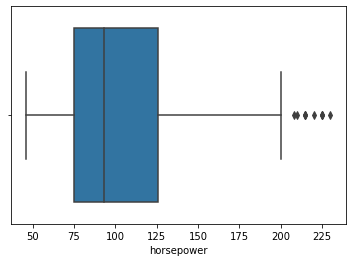

In [5]:
sns.boxplot(x='horsepower',data=auto_df)

In [6]:
auto_df[auto_df.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


### Horsepower values can be searched online
* ford pinto = 205 hp
* ford maverick = 191 hp
* renault lecar deluxe = 51 hp
* ford mustang cobra = 235 hp
* renault 18i = 64 hp
* amc concord dl = 112 hp

In [7]:
auto_df[auto_df.horsepower=='ford pinto'].horsepower = 205
auto_df[auto_df.horsepower=='ford maverick'].horsepower = 191
auto_df[auto_df.horsepower=='renault lecar deluxe'].horsepower = 51
auto_df[auto_df.horsepower=='ford mustang cobra'].horsepower = 235
auto_df[auto_df.horsepower=='renault 18i'].horsepower = 64
auto_df[auto_df.horsepower=='amc concord dl'].horsepower = 112

In [8]:
auto_df.horsepower.isnull().sum()

6

<AxesSubplot:xlabel='horsepower'>

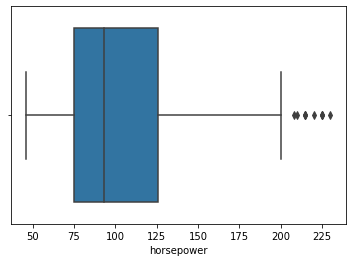

In [9]:
sns.boxplot(x='horsepower',data=auto_df)

In [10]:
auto_df.horsepower.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

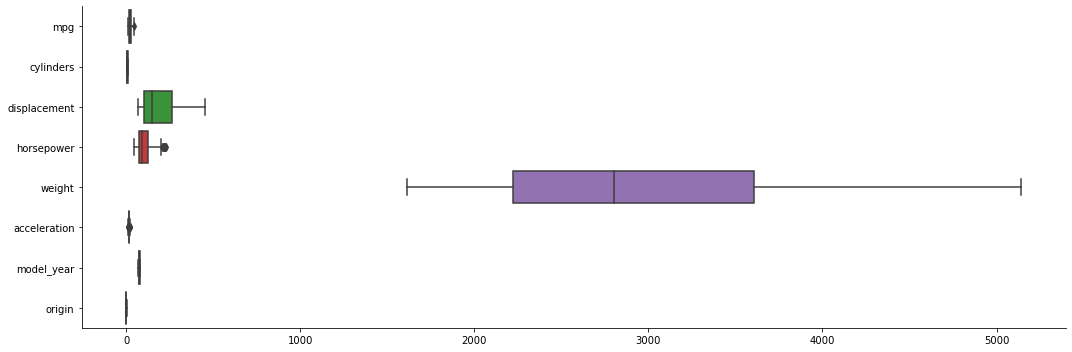

In [11]:
sns.catplot(data=auto_df,orient='h',kind='box',aspect=3)

Missing values has been replced, now we can analyze the data

In [17]:
auto_df.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

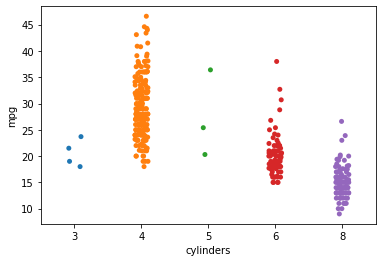

In [31]:
sns.stripplot(x='cylinders',y='mpg',data=auto_df)

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

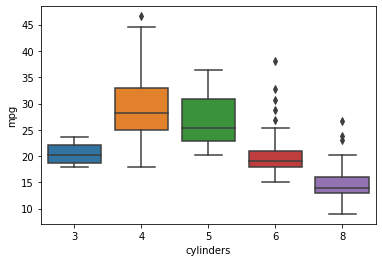

In [32]:
sns.boxplot(x='cylinders',y='mpg',data=auto_df)

In [36]:
for x in auto_df.cylinders.unique():
    mid=auto_df[auto_df.cylinders==x].mpg.median()
    print(f'{x} : {mid}')

8 : 14.0
4 : 28.25
6 : 19.0
3 : 20.25
5 : 25.4


As cylinders are increased from 4 to 5 there is a dip in mpg following the same pattern. there are some outliers that may be depended on other modification of the engines.from this we can roughly say higher cylinders the more fuel is consumed.

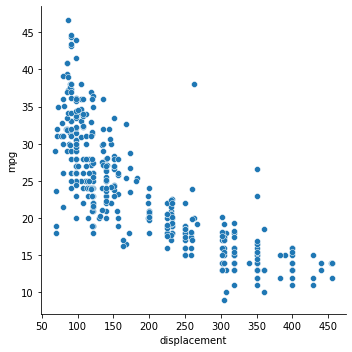

In [37]:
sns.relplot(x='displacement',y='mpg',data=auto_df)

<AxesSubplot:xlabel='displacement'>

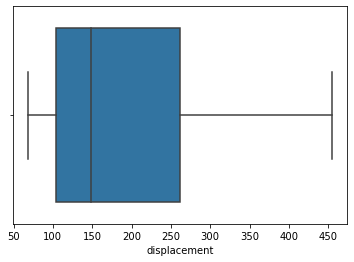

In [39]:
sns.boxplot(x='displacement',data=auto_df)

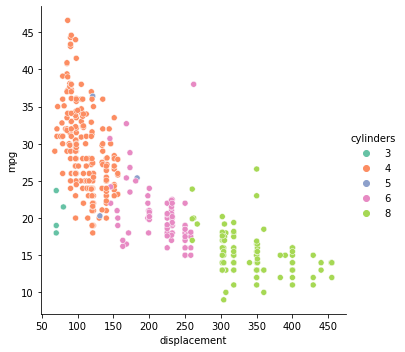

In [45]:
#['r','g','b','y','v']
sns.relplot(x='displacement',y='mpg',data=auto_df,hue='cylinders',palette='Set2')

If displacement is less it results in less consumption of fuel. mpg can be controled with making some changes in diameter of cylinders or length as it controls the displacement, even if no of cylinders increases.

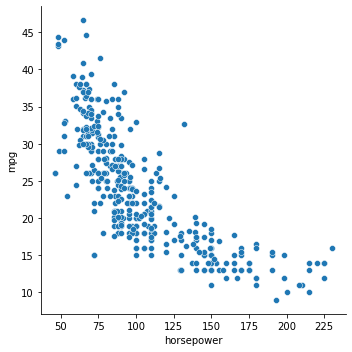

In [46]:
sns.relplot(x='horsepower',y='mpg',data=auto_df)

<AxesSubplot:xlabel='horsepower'>

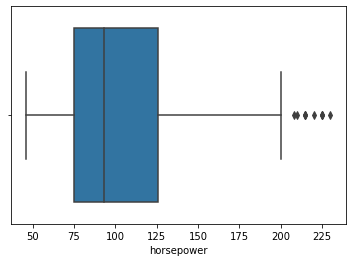

In [47]:
sns.boxplot(x='horsepower',data=auto_df)

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

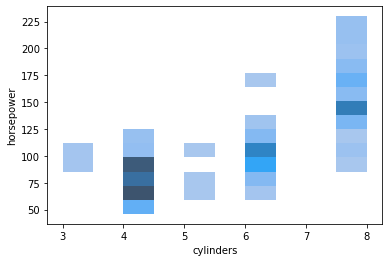

In [48]:
sns.histplot(x='cylinders',y='horsepower',data=auto_df)

Horsepower can be said to be inversly proportional to the fuel consumption.

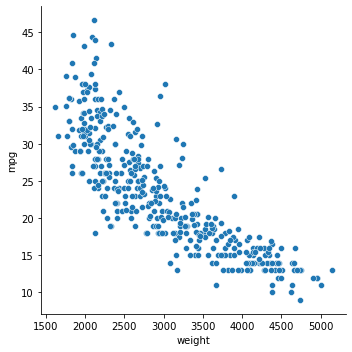

In [49]:
sns.relplot(x='weight',y='mpg',data=auto_df)

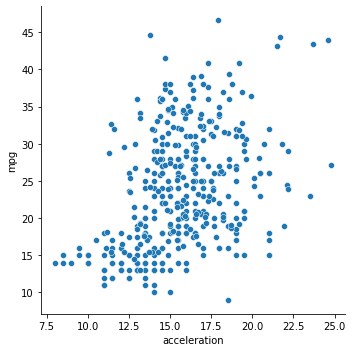

In [50]:
sns.relplot(x='acceleration',y='mpg',data=auto_df)

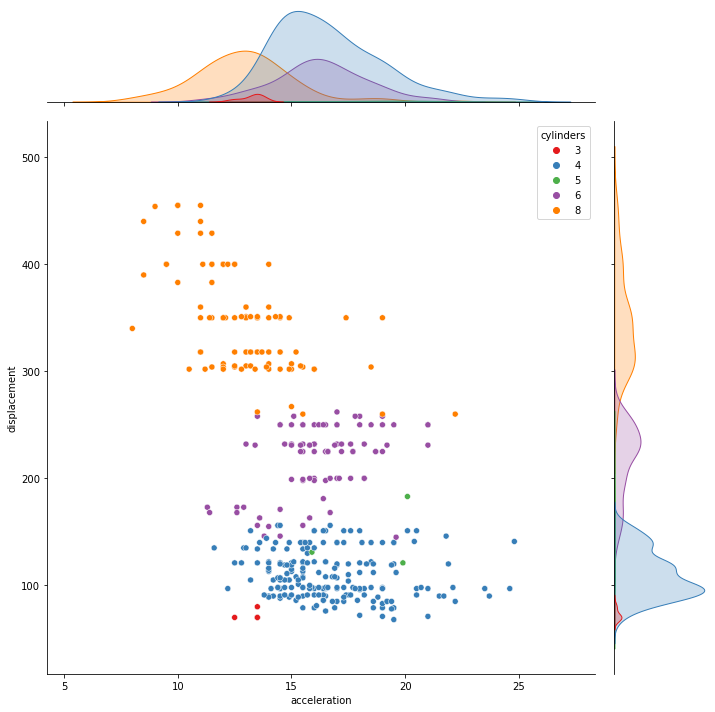

In [66]:
sns.jointplot(x='acceleration',y='displacement',data=auto_df,hue='cylinders',palette='Set1',height=10)

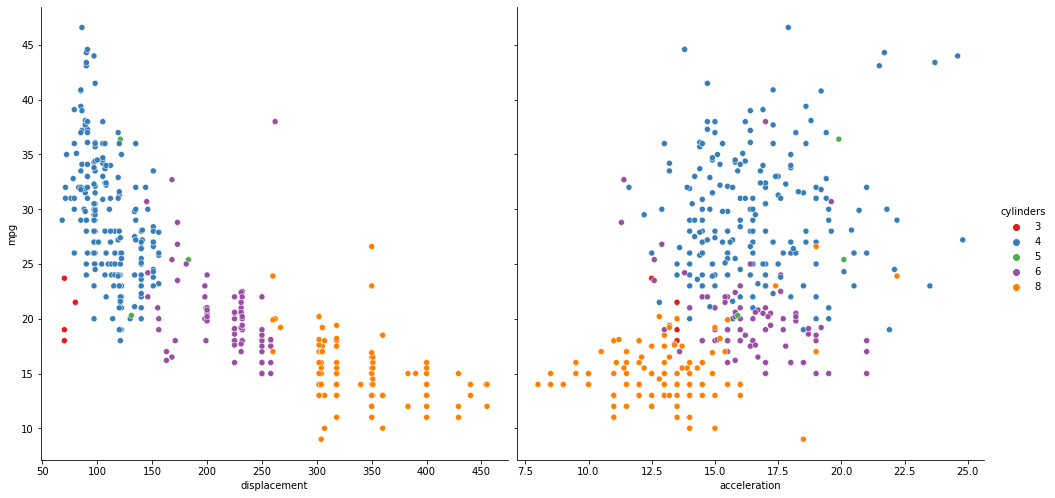

In [64]:
sns.pairplot(data=auto_df,y_vars='mpg',x_vars=['displacement','acceleration'],hue='cylinders',palette='Set1',height=7,aspect=1)

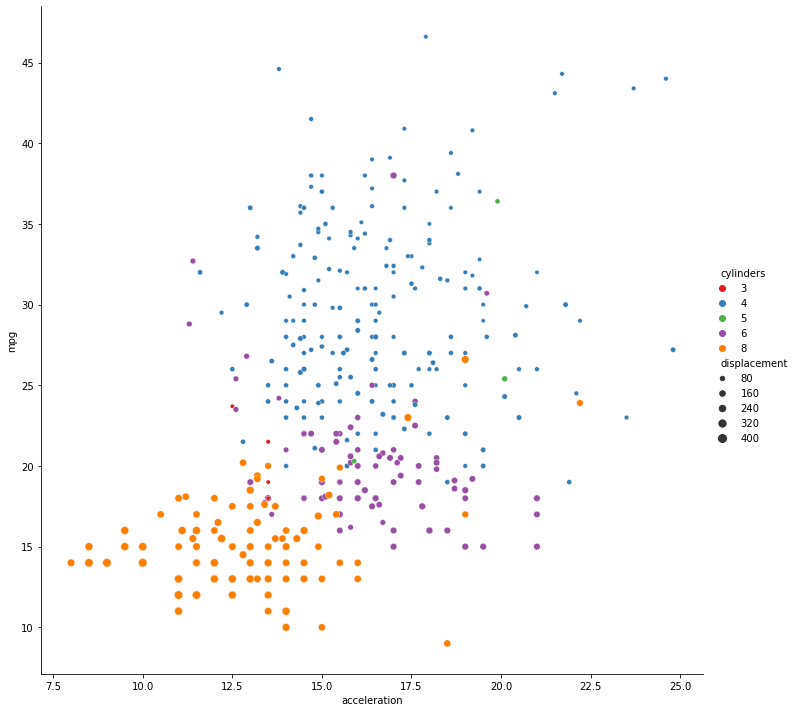

In [68]:
sns.relplot(x='acceleration',y='mpg',data=auto_df,hue='cylinders',palette='Set1',size='displacement',height=10)

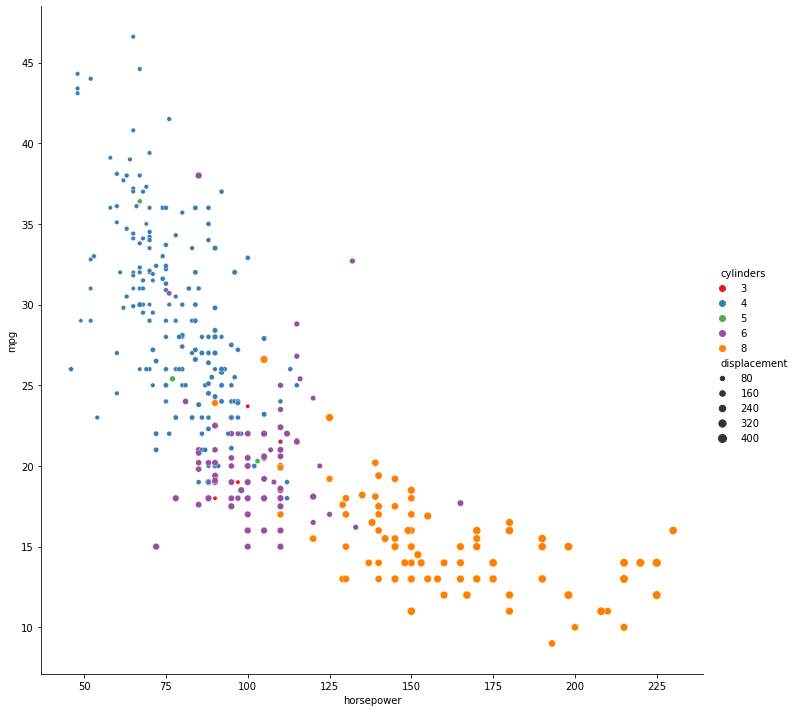

In [69]:
sns.relplot(x='horsepower',y='mpg',data=auto_df,hue='cylinders',palette='Set1',size='displacement',height=10)

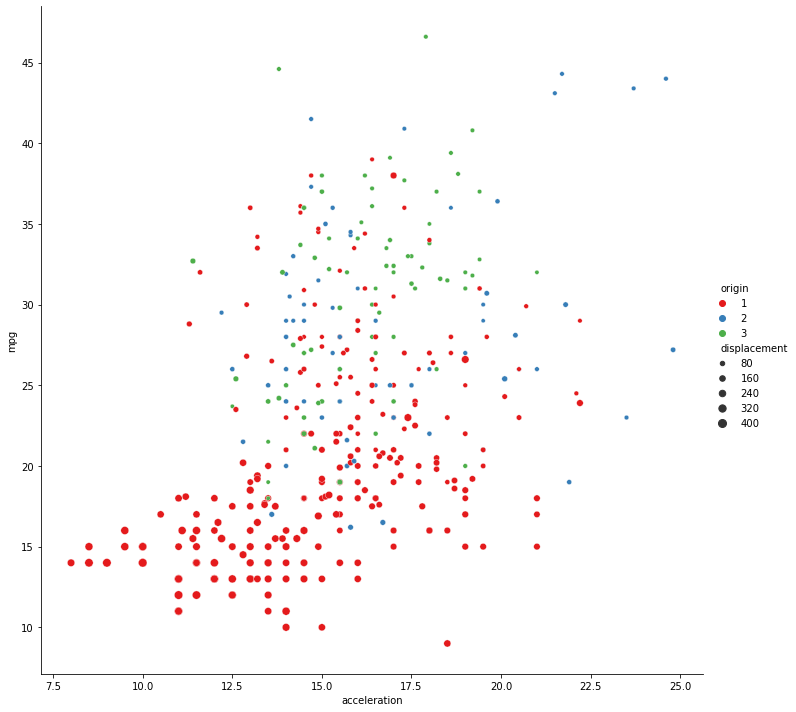

In [70]:
sns.relplot(x='acceleration',y='mpg',data=auto_df,hue='origin',palette='Set1',size='displacement',height=10)

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

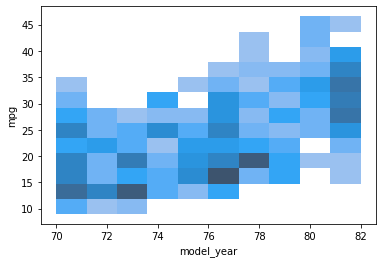

In [74]:
sns.histplot(x='model_year',y='mpg',data=auto_df)

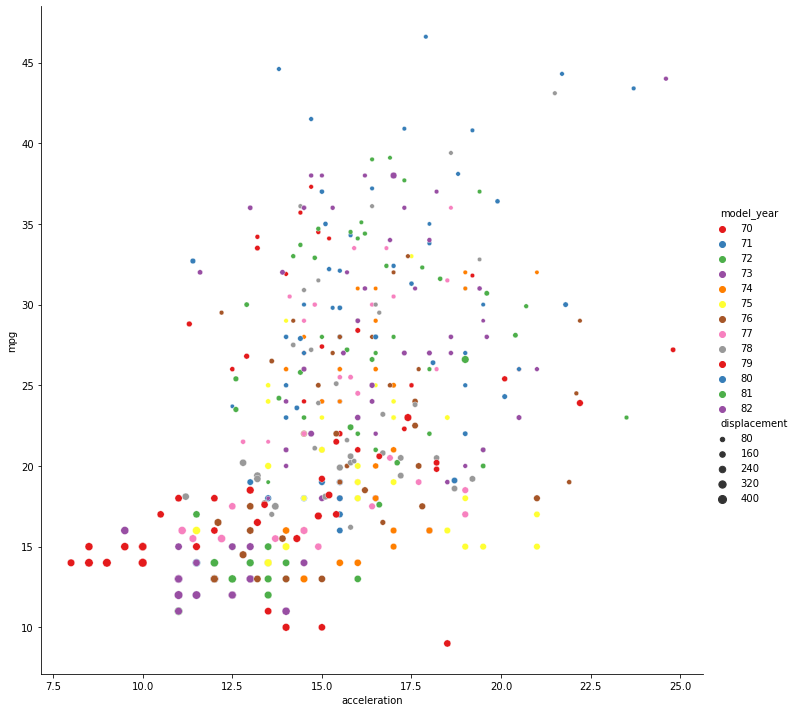

In [75]:
sns.relplot(x='acceleration',y='mpg',data=auto_df,hue='model_year',palette='Set1',size='displacement',height=10)

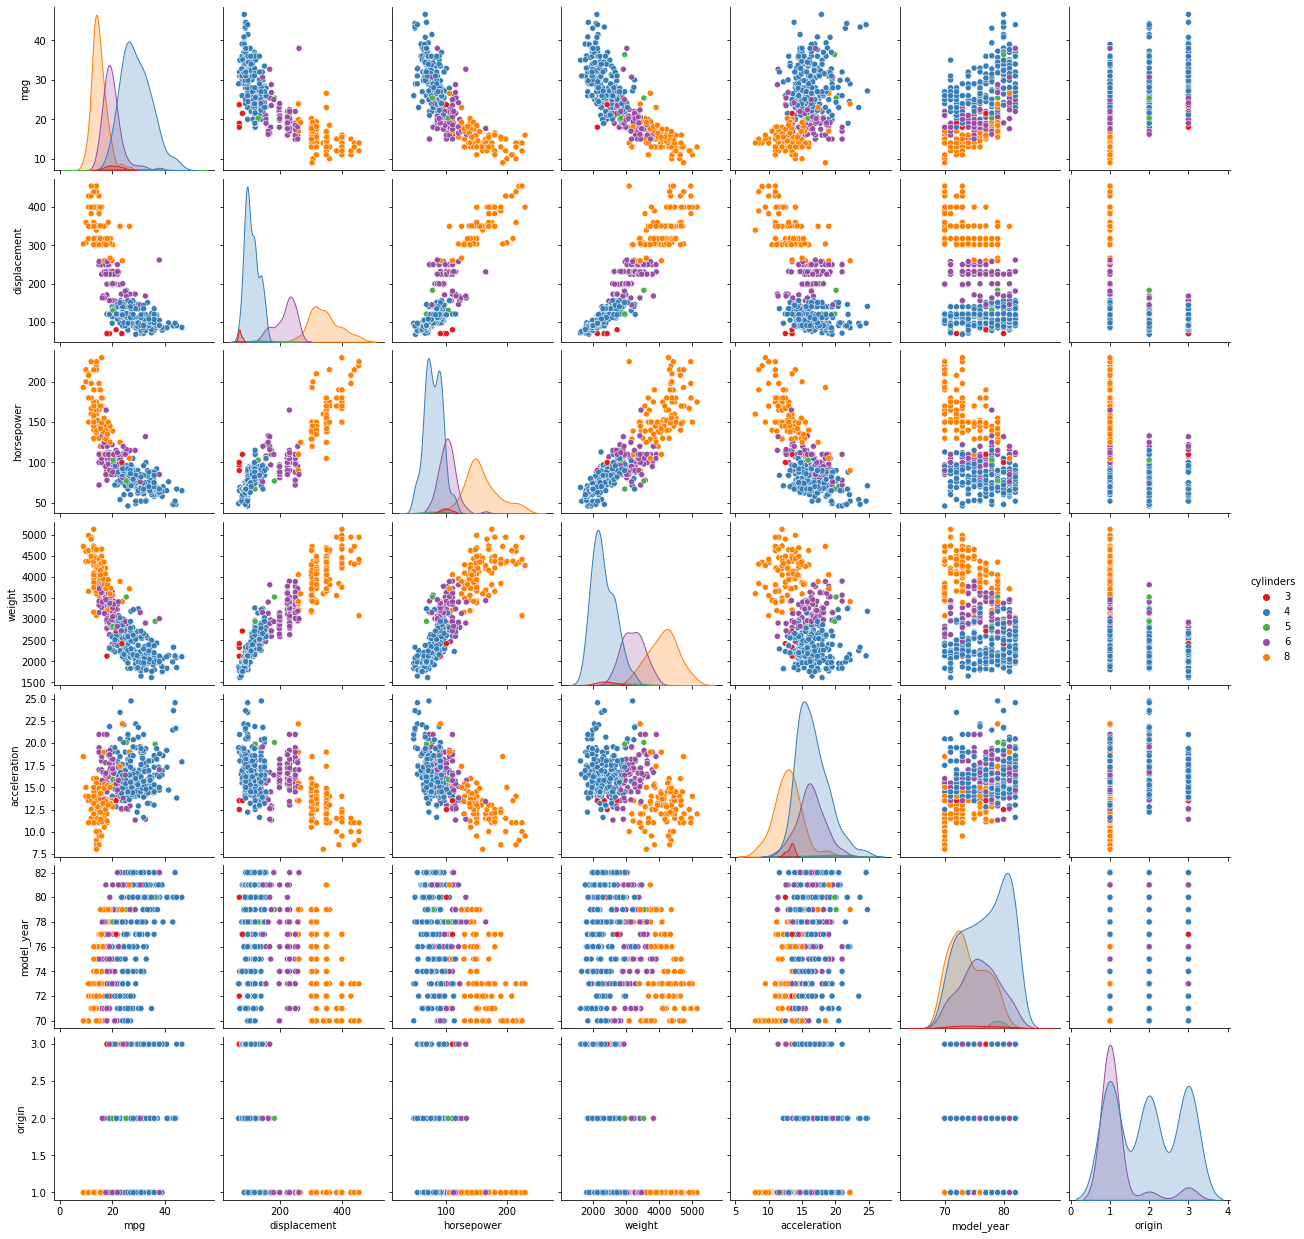

In [80]:
sns.pairplot(auto_df,hue='cylinders',palette='Set1')

###  From above data we can make some rough conclusions
* As year increases we can see some developnment in engines as 6 or 8 cyliders are also showing developnment in mpg.
* Acceleration and mpg is directly proportional while acceleration is seen to be conversly propotion to displacement,horspower and weight.
* As weight of car increases the mpg decreeases.


### Conclusion
* As per Requirements/Objective it would be ideal to build a engine with 4 to 6 cylinders (preferably 4), should be light weight with more acceleration, the displacement should be reduce which would indirectly decrease horsepower.